### Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [4]:
X[1].min(), X[1].max()

(0, 10)

In [5]:
X[2].min(), X[2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [7]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 5.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [8]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.5       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

Стандартизация

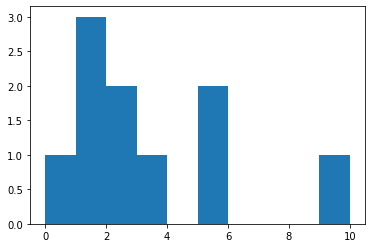

In [9]:
plt.hist(X[1])
plt.show()

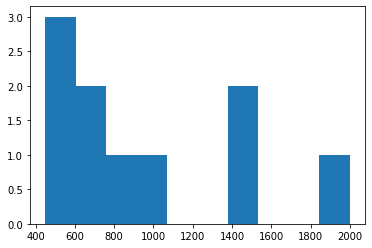

In [10]:
plt.hist(X[2])
plt.show()

In [11]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
print(X1_mean, X1_std)

3.0 2.8284271247461903


In [12]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-7.07106781e-01, -7.07106781e-01, -3.53553391e-01,
         7.07106781e-01,  0.00000000e+00, -1.06066017e+00,
         7.07106781e-01,  2.47487373e+00, -7.07106781e-01,
        -3.53553391e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

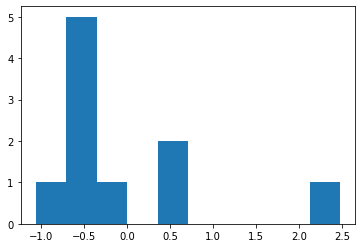

In [13]:
plt.hist(X_st[1])
plt.show()

In [14]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [15]:
X_st[2] = calc_std_fit(X[2])

In [16]:
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

SGD (Stochastic gradient descent)

In [17]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [18]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [19]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [48.88713854  4.93070338  2.24970636  5.16695074] 86.56756619204006
200 [55.49038569  5.42590311  1.70909278  5.29455404] 26.71749137641205
300 [56.3661054   5.71463938  1.28763574  5.45071737] 25.385335549183218
400 [56.48224296  5.89323533  0.96183061  5.61377198] 25.200609132836966
500 [56.49764507  6.0075244   0.70607554  5.7664527 ] 25.097629212579754
600 [56.49968769  6.08341914  0.50301735  5.90181934] 25.03181571476049
700 [56.49995858  6.13575608  0.34048461  6.0181841 ] 24.988819687554713
800 [56.49999451  6.17316058  0.20964523  6.11636186] 24.960472286579364
900 [56.49999927  6.20074955  0.1039009   6.19822575] 24.941703516246292
1000 [5.64999999e+01 6.22163781e+00 1.82046545e-02 6.26596976e+00] 24.9292524321339


array([5.64999999e+01, 6.22163781e+00, 1.82046545e-02, 6.26596976e+00])

In [20]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
#             print(b, n_batch, start_, end_)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)

            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [21]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=4, alpha=1e-2)

500 [56.50800244  5.93426415  0.84118436  5.71165589] 12.701481062640205
1000 [5.65105044e+01 6.21912493e+00 5.57268096e-02 6.24370533e+00] 11.83657888787129
1500 [56.51057707  6.28123125 -0.21407497  6.46060696] 11.487426059917677
2000 [56.5106047   6.30150559 -0.31047979  6.5399407 ] 11.36044261549272
2500 [56.51061471  6.30869314 -0.34512681  6.56854696] 11.31479865071951
3000 [56.51061832  6.31127335 -0.35758896  6.57884114] 11.298394313517017
3500 [56.51061962  6.31220128 -0.36207198  6.58254453] 11.292495605661445
4000 [56.51062009  6.31253507 -0.36368468  6.58387679] 11.290373974630935
4500 [56.51062025  6.31265515 -0.36426484  6.58435605] 11.289610791026963
5000 [56.51062032  6.31269835 -0.36447354  6.58452846] 11.289336251093353


array([56.51062032,  6.31269835, -0.36447354,  6.58452846])

L1 регуляризация

L2 регуляризация

In [67]:
np.random.randn(X.shape[1])

array([-0.46947439,  0.54256004, -0.46341769, -0.46572975,  0.24196227,
       -1.91328024, -1.72491783, -0.56228753, -1.01283112,  0.31424733])

In [22]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [23]:
W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

In [19]:
eval_model(X_st, y, iterations=5000, alpha=1e-2)

500 [56.49767254  5.83477719  1.36781865  5.25424451] 25.413829625514786
1000 [56.4999999   6.17124081  0.25269258  6.07416416] 24.969784391475397
1500 [56.5         6.2575128  -0.13774522  6.39128671] 24.913059475565493
2000 [56.5         6.28678323 -0.27772011  6.50655795] 24.905712417850083
2500 [56.5         6.29722767 -0.32807425  6.54810646] 24.904760553791704
3000 [56.5         6.30098239 -0.34619733  6.56306445] 24.904637232271696
3500 [56.5         6.30233363 -0.3527205   6.5684486 ] 24.904621254991206
4000 [56.5         6.30281999 -0.35506846  6.57038658] 24.904619185007867
4500 [56.5         6.30299505 -0.35591359  6.57108415] 24.904618916825108
5000 [56.5         6.30305806 -0.35621778  6.57133523] 24.90461888207993


array([56.5       ,  6.30305806, -0.35621778,  6.57133523])

## Д/з

* Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [60]:
ii =[]
WW =[]
for i in range(0, 50, 1):
    ii.append(i)
    WW.append(eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=10**(-i/10)))

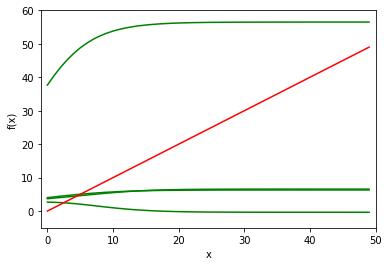

In [63]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5, 60)
plt.xlim(-1,50)

plt.plot(WW, color='g')
plt.plot(ii, color='r')

* Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

In [ ]:
'''
в принципе конечно можно) но наверно бессмысленно - в обоих случаях это изменение насштаба -
суть не меняеться - меняется только форма выдачи и будет соответсвовать последнему примененному способу

* Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [71]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.abs(W)) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

'''
Я все же как-то сильно плаваю в момент перехода от обычных математических формул к программе - то есть например:

L2 - исходно формула такая, 
f(x, W) + (lambda_/2) * np.sum(W**2)

а куда пропал **2 в 
W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W)


, соответсвенно я конечно добавил lambda_ * np.abs(W)),
но при этом понятно, что сама функция практически не изменилась
'''

In [72]:
W = eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

500 [56.49487895  5.89947314  1.04054603  5.5270874 ] 25.237558330104108
1000 [56.49717505  6.19501568  0.13564839  6.17098435] 24.94708965113865
1500 [56.49717514  6.26566811 -0.17872571  6.42518789] 24.910198930618716
2000 [56.49717514  6.28928075 -0.29131606  6.51783757] 24.90537530009977
2500 [56.49717514  6.2976877  -0.33181608  6.55124739] 24.904733718580054
3000 [56.49717514  6.30070921 -0.34639339  6.56327694] 24.90464462507498
3500 [56.49717514  6.30179662 -0.35164072  6.56760738] 24.90463093559285
4000 [56.49717514  6.30218804 -0.3535296   6.56916621] 24.90462838963693
4500 [56.49717514  6.30232894 -0.35420954  6.56972735] 24.904627781805267
5000 [56.49717514  6.30237966 -0.3544543   6.56992934] 24.904627602996662


In [70]:
W

array([56.49717514,  6.30237966, -0.3544543 ,  6.56992934])